In [1]:
import sys
sys.path.append(r"/mnt/ceph/users/tudomlumleart/00_VirtualEnvironments/teeu/lib/python3.10/site-packages")
sys.path.append(r"/mnt/home/tudomlumleart/.local/lib/python3.10/site-packages/")
sys.path.append(r"/mnt/home/tudomlumleart/ceph/00_VirtualEnvironments/jupyter-gpu/lib/python3.10/site-packages")
from utils import *
from functions import *
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture 
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import validation_curve

os.environ['TF_ENABLE_ONEDNN_OPTS']='0'

from sklearn.metrics import adjusted_mutual_info_score

import os
import scipy.io

In [2]:
# Load dataset from file
folder_path = '/mnt/home/tudomlumleart/ceph/05_Sox9Dataset/'

# List all .mat files in the folder and load them
cnc_maps = scipy.io.loadmat(folder_path + 'cncMaps.mat')['cncMaps'][:80, :80, :]
esc_maps = scipy.io.loadmat(folder_path + 'escMaps.mat')['escMaps'][:80, :80, :]

# Load polys data and then perform linear interpolation
# List all .mat files in the folder and load them
cnc_polys = scipy.io.loadmat(folder_path + 'cncPols.mat')['cncPols'][:80, :, :]
esc_polys = scipy.io.loadmat(folder_path + 'escPols.mat')['escPols'][:80, :, :]


In [6]:
# Count missing data per map 
missing_cnc = np.sum(np.isnan(cnc_maps), axis=(0, 1)) / (80 * 80)
missing_esc = np.sum(np.isnan(esc_maps), axis=(0, 1)) / (80 * 80)

In [7]:
# Add these values to the dataframe 
cnc_df = pd.DataFrame(missing_cnc, columns=['missing_frac'])
cnc_df['label'] = 'cnc'
esc_df = pd.DataFrame(missing_esc, columns=['missing_frac'])
esc_df['label'] = 'esc'
all_df = pd.concat([cnc_df, esc_df])

In [14]:
save_dir = '/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/figures/20240812'

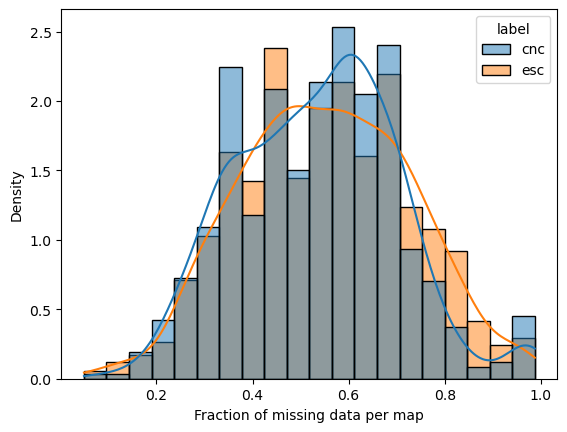

In [15]:
# Plot the histogram of missing data
sns.histplot(all_df, x='missing_frac', hue='label', 
             bins=20, kde=True, 
             stat='density', common_norm=False)
plt.xlabel('Fraction of missing data per map')
plt.savefig(os.path.join(save_dir, 'missing_data_hist.png')) 